In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

In [10]:
dataframe = pd.read_csv('dataframe_PCA.csv')
X = dataframe.drop(columns=['Label', 'Patient index'])
y = dataframe['Label']

test_size = 0.1
random_state = 21

results_SVM = []
print(f"Test size: {test_size}, Random state: {random_state}")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


# 训练随机森林分类器 Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


Test size: 0.1, Random state: 21


RandomForestClassifier(random_state=42)

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       295
           1       0.64      0.59      0.61       238

    accuracy                           0.67       533
   macro avg       0.66      0.66      0.66       533
weighted avg       0.66      0.67      0.66       533

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       295
           1       0.64      0.59      0.61       238

    accuracy                           0.67       533
   macro avg       0.66      0.66      0.66       533
weighted avg       0.66      0.67      0.66       533

Confusion matrix:
 [[214  81]
 [ 97 141]]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing f

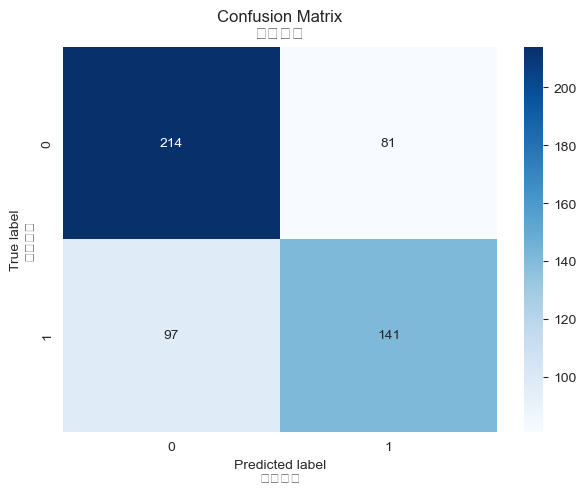

Accuracy: 0.6660412757973734
Precision: 0.6644512492681263
Recall: 0.6660412757973734
F1 score: 0.6646419940142313


In [11]:
# 评估随机森林分类器 Evaluate Random Forest classifier
y_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred))

# 评估性能
print("Classification report:\n", classification_report(y_test, y_pred))

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# 绘制中英文混淆矩阵
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label\n预测标签')
plt.ylabel('True label\n真实标签')
plt.title('Confusion Matrix\n混淆矩阵')
plt.show()

# 性能指标
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

# # 重新考虑应用 K 折叠和网格搜索
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# kernel_params = {
#     'linear': {'C': [0.1, 1, 10, 100]},
#     'poly': {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'coef0': [0, 1]},
#     'rbf': {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
#     'sigmoid': {'C': [0.1, 1, 10, 100], 'coef0': [0, 1]}
# }
#
# grid_search = GridSearchCV(svm, kernel_params['rbf'], cv=5, scoring='f1_weighted', n_jobs=4)
# grid_search.fit(X_train, y_train)
#
# print("Best parameters found:", grid_search.best_params_)
# print("Best score found:", grid_search.best_score_)
#
# # 使用最佳参数重新评估模型
# best_svm = grid_search.best_estimator_
# y_pred = best_svm.predict(X_test)
# print("Classification report:\n", classification_report(y_test, y_pred))